In [10]:
import pandas as pd 

In [11]:
df = pd.read_csv('Combine Review Data set.csv')[['Destination_link','Review','Sentiment Score']]

In [12]:
df.head()

,Destination_link,Review,Sentiment Score
0,9376,Thank you for help making my honeymoon a memor...,5
1,9376,Our guide really made the tour great. The dest...,5
2,9376,I really appreciate everything that Travel Tal...,5
3,9376,Overall it was such a surreal and fun experien...,4
4,9376,I really enjoyed me tour it was excellent. I m...,5


In [13]:
df = df[['Destination_link','Review','Sentiment Score']]
df.head()

,Destination_link,Review,Sentiment Score
0,9376,Thank you for help making my honeymoon a memor...,5
1,9376,Our guide really made the tour great. The dest...,5
2,9376,I really appreciate everything that Travel Tal...,5
3,9376,Overall it was such a surreal and fun experien...,4
4,9376,I really enjoyed me tour it was excellent. I m...,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Destination_link  7912 non-null   int64 
 1   Review            7912 non-null   object
 2   Sentiment Score   7912 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 185.6+ KB


### Let's Do some stemmimg and lemmatization 

In [15]:
!python -m spacy download en_core_web_lg


2023-06-07 01:21:10.032454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 01:21:11.185300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [16]:
import spacy
nlp = spacy.load("en_core_web_lg") # if this fails then run "python -m spacy download en_core_web_lg" to download that model

In [17]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.1/1662.8MB downloaded


In [18]:
wv.similarity('good', 'better')

0.6120729

In [19]:
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return filtered_tokens


In [20]:
df['Pre processed text'] = df['Review'].apply(lambda text: preprocess_and_vectorize(text))

In [21]:
df.head()

,Destination_link,Review,Sentiment Score,Pre processed text
0,9376,Thank you for help making my honeymoon a memor...,5,"[thank, help, make, honeymoon, memorable, expe..."
1,9376,Our guide really made the tour great. The dest...,5,"[guide, tour, great, destination, visit, inter..."
2,9376,I really appreciate everything that Travel Tal...,5,"[appreciate, travel, talk, holiday, memorable,..."
3,9376,Overall it was such a surreal and fun experien...,4,"[overall, surreal, fun, experience, people, me..."
4,9376,I really enjoyed me tour it was excellent. I m...,5,"[enjoy, tour, excellent, meet, great, people, ..."


In [22]:
df['Pre-processed combine text'] = df['Pre processed text'].tolist()
df.head()

,Destination_link,Review,Sentiment Score,Pre processed text,Pre-processed combine text
0,9376,Thank you for help making my honeymoon a memor...,5,"[thank, help, make, honeymoon, memorable, expe...","[thank, help, make, honeymoon, memorable, expe..."
1,9376,Our guide really made the tour great. The dest...,5,"[guide, tour, great, destination, visit, inter...","[guide, tour, great, destination, visit, inter..."
2,9376,I really appreciate everything that Travel Tal...,5,"[appreciate, travel, talk, holiday, memorable,...","[appreciate, travel, talk, holiday, memorable,..."
3,9376,Overall it was such a surreal and fun experien...,4,"[overall, surreal, fun, experience, people, me...","[overall, surreal, fun, experience, people, me..."
4,9376,I really enjoyed me tour it was excellent. I m...,5,"[enjoy, tour, excellent, meet, great, people, ...","[enjoy, tour, excellent, meet, great, people, ..."


In [23]:
x = df['Pre processed text'][0]
x

['thank',
 'help',
 'make',
 'honeymoon',
 'memorable',
 'experience',
 'travel',
 'talk']

In [24]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [25]:
import numpy as np

In [26]:
df['Tokens'] = df['Pre processed text'].apply(sent_vec)

In [27]:
len(df['Tokens'][4])

300

In [28]:
df.head()

,Destination_link,Review,Sentiment Score,Pre processed text,Pre-processed combine text,Tokens
0,9376,Thank you for help making my honeymoon a memor...,5,"[thank, help, make, honeymoon, memorable, expe...","[thank, help, make, honeymoon, memorable, expe...","[-0.006766425238715278, 0.007649739583333333, ..."
1,9376,Our guide really made the tour great. The dest...,5,"[guide, tour, great, destination, visit, inter...","[guide, tour, great, destination, visit, inter...","[0.018971761067708332, 0.0577392578125, -0.048..."
2,9376,I really appreciate everything that Travel Tal...,5,"[appreciate, travel, talk, holiday, memorable,...","[appreciate, travel, talk, holiday, memorable,...","[0.038088285006009616, 0.08520859938401443, -0..."
3,9376,Overall it was such a surreal and fun experien...,4,"[overall, surreal, fun, experience, people, me...","[overall, surreal, fun, experience, people, me...","[0.030917697482638888, 0.054072062174479164, -..."
4,9376,I really enjoyed me tour it was excellent. I m...,5,"[enjoy, tour, excellent, meet, great, people, ...","[enjoy, tour, excellent, meet, great, people, ...","[0.005928766159784226, 0.042163667224702384, -..."


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Tokens.values, 
    df['Sentiment Score'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df['Sentiment Score']
)

In [30]:
X = df.Tokens.values
y =  df['Sentiment Score']

In [31]:
X_2d = np.stack(X)

In [32]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

Shape of X_train before reshaping:  (6329,)
Shape of X_test before reshaping:  (1583,)


In [33]:
X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train after reshaping:  (6329, 300)
Shape of X_test after reshaping:  (1583, 300)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.53      0.62        32
           2       0.54      0.15      0.24        46
           3       0.58      0.33      0.42        78
           4       0.71      0.40      0.51       240
           5       0.85      0.98      0.91      1187

    accuracy                           0.82      1583
   macro avg       0.68      0.48      0.54      1583
weighted avg       0.80      0.82      0.80      1583



Text(95.72222222222221, 0.5, 'Truth')

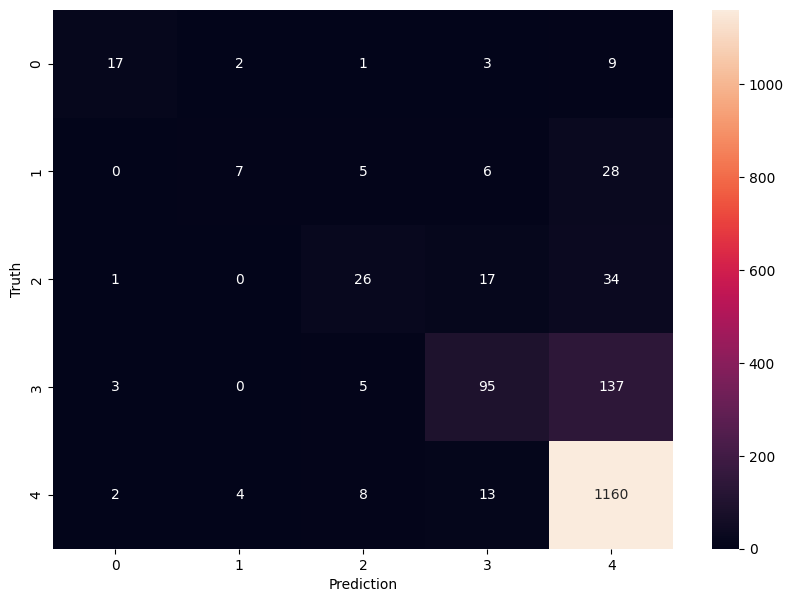

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [36]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00       240
           5       0.75      1.00      0.86      1187

    accuracy                           0.75      1583
   macro avg       0.15      0.20      0.17      1583
weighted avg       0.56      0.75      0.64      1583



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.44      0.60        32
           2       0.44      0.15      0.23        46
           3       0.58      0.28      0.38        78
           4       0.58      0.41      0.48       240
           5       0.85      0.96      0.90      1187

    accuracy                           0.81      1583
   macro avg       0.68      0.45      0.52      1583
weighted avg       0.78      0.81      0.78      1583



In [38]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
import xgboost
model = xgboost.XGBClassifier()

In [42]:
classifer = RandomizedSearchCV(model, param_distributions=params, n_iter=5, scoring='roc_auc', cv = 5, n_jobs=-1)

In [43]:
y = [element - 1 for element in y]

In [44]:
classifer.fit(X_2d,y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc')

In [45]:
classifer.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [46]:
classifer.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [47]:
Model1 = xgboost.XGBRFClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob',)

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Model1,X_2d,y,cv=10)

In [49]:
score

array([0.75      , 0.75      , 0.75094817, 0.76232617, 0.75726928,
       0.75726928, 0.75347661, 0.7863464 , 0.75979772, 0.7699115 ])

In [50]:
score.mean()

0.7597345132743363